In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn

In [3]:
(X_train , y_train),(X_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(X_train)

60000

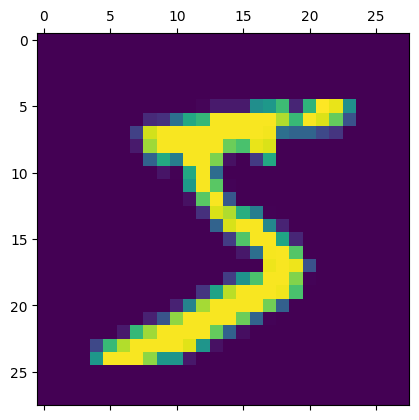

In [5]:
plt.matshow(X_train[0])

In [8]:
X_train[0].shape

(28, 28)

In [9]:
 X_train.shape

(60000, 28, 28)

In [21]:
X_train_flattened = X_train.reshape(len(X_train),28*28)/255
X_test_flattened = X_test.reshape(len(X_test),28*28)/255
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [22]:
X_train_flattened[0].shape

(784,)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8123 - loss: 0.7241
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9099 - loss: 0.3173
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9201 - loss: 0.2795
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9245 - loss: 0.2678
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9271 - loss: 0.2585


In [24]:
y_predict = model.predict(X_test_flattened)
y_predict[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.7475307e-02, 4.1146654e-07, 4.7034815e-02, 9.5733577e-01,
       2.6942303e-03, 1.3045409e-01, 1.9983552e-06, 9.9968082e-01,
       9.0917356e-02, 6.2169290e-01], dtype=float32)

In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8932 - loss: 5.7495


[5.177596092224121, 0.9053999781608582]

In [27]:
np.argmax(y_predict[0])

np.int64(7)

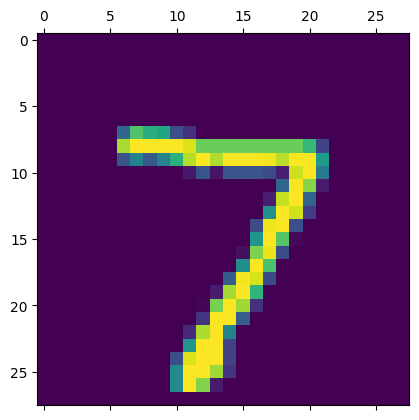

In [33]:
plt.matshow(X_test[0])


In [37]:
y_prediction_labels = [np.argmax(i) for i in y_predict]
y_prediction_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [39]:
cf = tf.math.confusion_matrix(labels=y_test, predictions=y_prediction_labels)
cf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    2,    0,    7,   10,    2,    2,    0],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   5,   10,  921,   17,    8,    5,   13,    9,   40,    4],
       [   2,    0,   17,  922,    1,   27,    3,    8,   22,    8],
       [   1,    1,    4,    1,  920,    0,   11,    3,   10,   31],
       [   8,    3,    2,   26,    8,  795,   13,    4,   28,    5],
       [   9,    3,    6,    1,    7,   14,  913,    2,    3,    0],
       [   1,   11,   23,    9,   11,    1,    0,  934,    1,   37],
       [   4,   10,    5,   21,    9,   33,    9,    7,  868,    8],
       [  10,    8,    1,   11,   29,    7,    0,   12,    9,  922]],
      dtype=int32)>

<Axes: >

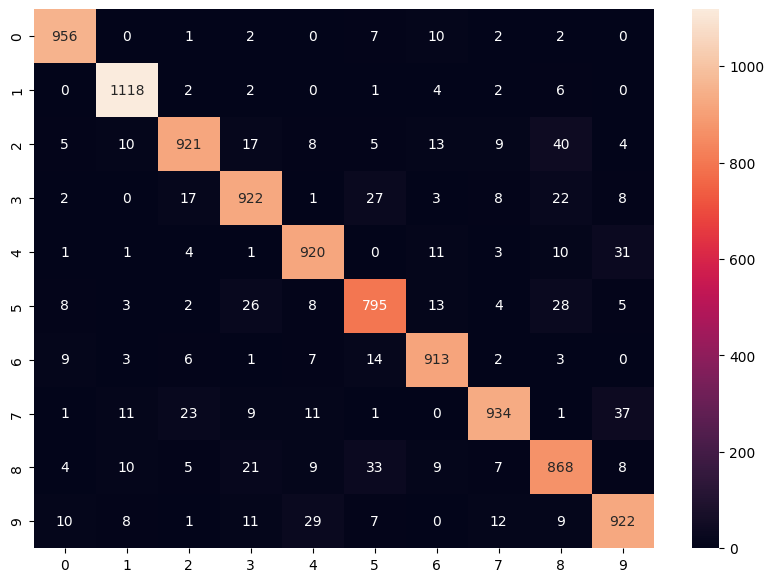

In [44]:
import seaborn as sns
plt.figure(figsize=(10,7))
plt.xlabel('Predicted')
plt.ylabel('Truth')
sns.heatmap(cf, annot=True, fmt='d')

In [45]:
#using more hidden layers increases the accuracy of the model